In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/kaggle/input/plant-growth-data-classification/plant_growth_data.csv')

# Data Overview

In [44]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [45]:
df.shape

(193, 7)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [47]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [48]:
df[df.duplicated()]

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone


In [49]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


# Visualization

Text(0, 0.5, '')

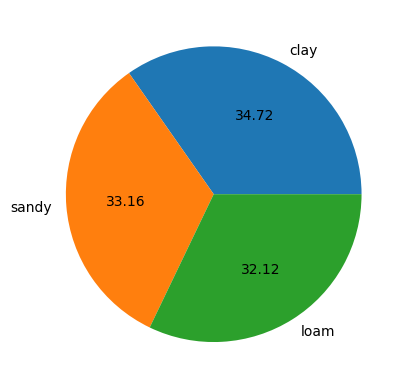

In [50]:
df['Soil_Type'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.ylabel(None)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sunlight_Hours', ylabel='Count'>

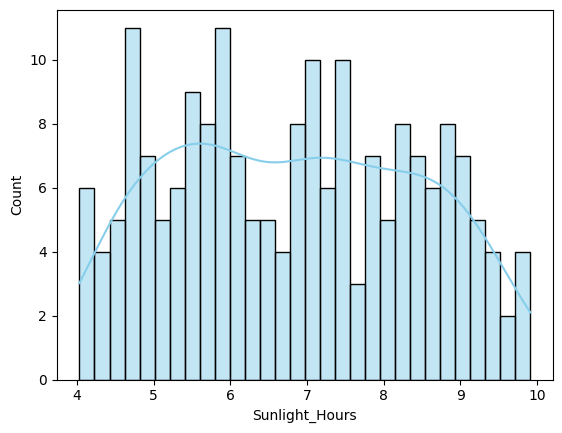

In [51]:
sns.histplot(df['Sunlight_Hours'], bins = 30, kde = True , color='skyblue')

<Axes: xlabel='Growth_Milestone', ylabel='count'>

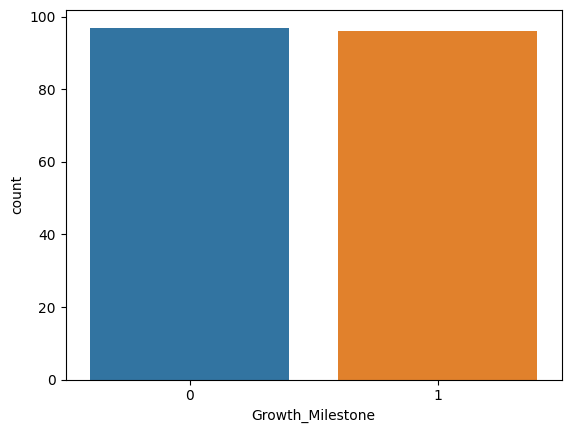

In [52]:
sns.countplot(x = 'Growth_Milestone', data =  df)

<Axes: >

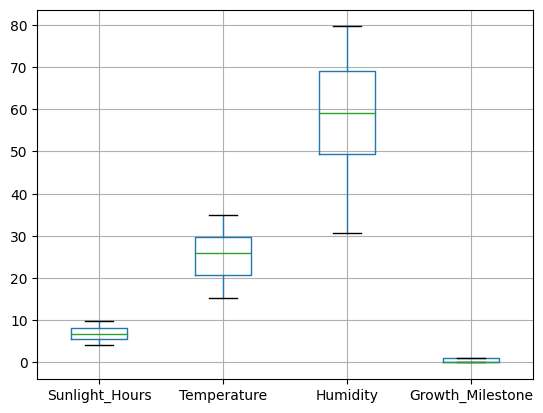

In [53]:
df.boxplot()

In [54]:
df1 = df['Water_Frequency'].value_counts()

<Axes: ylabel='Water_Frequency'>

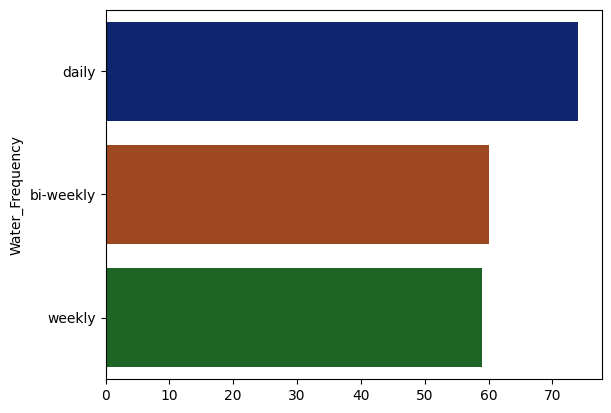

In [55]:
sns.barplot(x = df1.values, y = df1.index, palette = 'dark')

<Axes: xlabel='Fertilizer_Type'>

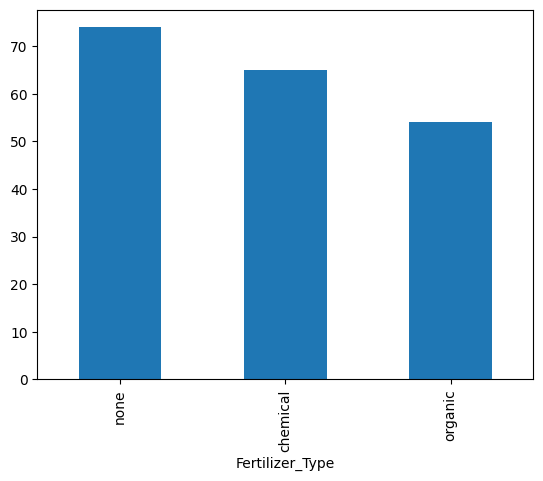

In [56]:
df['Fertilizer_Type'].value_counts().plot(kind = 'bar')

# Correlation Heatmap

<Axes: >

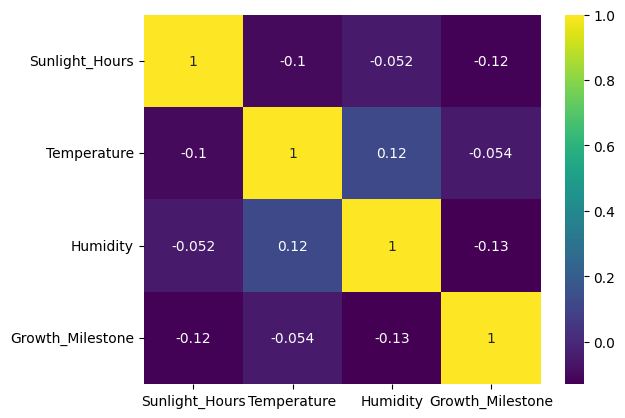

In [57]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot = True, cmap = 'viridis')

# Model Training

In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
x = df.drop('Growth_Milestone', axis = 1)
y = df['Growth_Milestone']

In [60]:
enc = LabelEncoder()

In [61]:
x_obj = x.select_dtypes(include=['object'])
for col in x_obj:
    x[col] = enc.fit_transform(x[col])

In [62]:
x.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,1,5.192294,0,0,31.719602,61.591861
1,2,4.033133,2,2,28.919484,52.422276
2,1,8.892769,0,1,23.179059,44.660539
3,1,8.241144,0,1,18.465886,46.433227
4,2,8.374043,0,2,18.128741,63.625923


In [64]:
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])
x.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,0.018871,-1.024340,-1.266947,-1.204110,1.244039,0.277238
1,1.232875,-1.750923,1.280145,1.349662,0.719700,-0.450562
2,0.018871,1.295184,-1.266947,0.072776,-0.355230,-1.066621
3,0.018871,0.886734,-1.266947,0.072776,-1.237800,-0.925920
4,1.232875,0.970038,-1.266947,1.349662,-1.300933,0.438684


# Train test Split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
x_train.shape, x_test.shape

((154, 6), (39, 6))

# Model Training

In [74]:
svc = SVC(kernel='sigmoid', max_iter = 5,verbose=True)
svc.fit(x_train,y_train)

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 5
obj = -10.204174, rho = -0.035273
nSV = 10, nBSV = 10
Total nSV = 10


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='sigmoid', max_iter=5, verbose=True)

In [76]:
y_pred = svc.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

0.5897435897435898

In [79]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred = rfc.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred)

0.5641025641025641

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        17
           1       0.63      0.55      0.59        22

    accuracy                           0.56        39
   macro avg       0.57      0.57      0.56        39
weighted avg       0.57      0.56      0.57        39

